### Regresión

En un problema de regresion, buscamos predecir la salida de un valor continuo como la probabilidad de un precio. En contraste en un problema de Clasificacion, buscamos seleccionar una clase de una lista de clases (por ejemplo, en donde una imagen contenga una manzana o una naranja queremos reconocer cual es la fruta en la imagen).

Este cuaderno usa el set de datos clasico Auto MPG y construye un modelo para predecir la eficiencia de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

   8192/Unknown - 0s 0s/step

'C:\\Users\\rodri\\.keras\\datasets\\auto-mpg.data'

In [5]:
nombre_columnas = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

fila_dataset = pd.read_csv(dataset_path, names = nombre_columnas,
                           na_values = '?', comment = '\t', sep = ' ',
                           skipinitialspace = True)

df = fila_dataset.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
# Hacemos un 'one-hot' a la columna "Origin".
origin = df.pop('Origin')

df['USA'] = (origin == 1) * 1.0
df['Europe'] = (origin == 2) * 1.0
df['Japan'] = (origin == 3) * 1.0

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [11]:
# Dividimos la data en entrenamiento y prueba.
train_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(train_data.index)

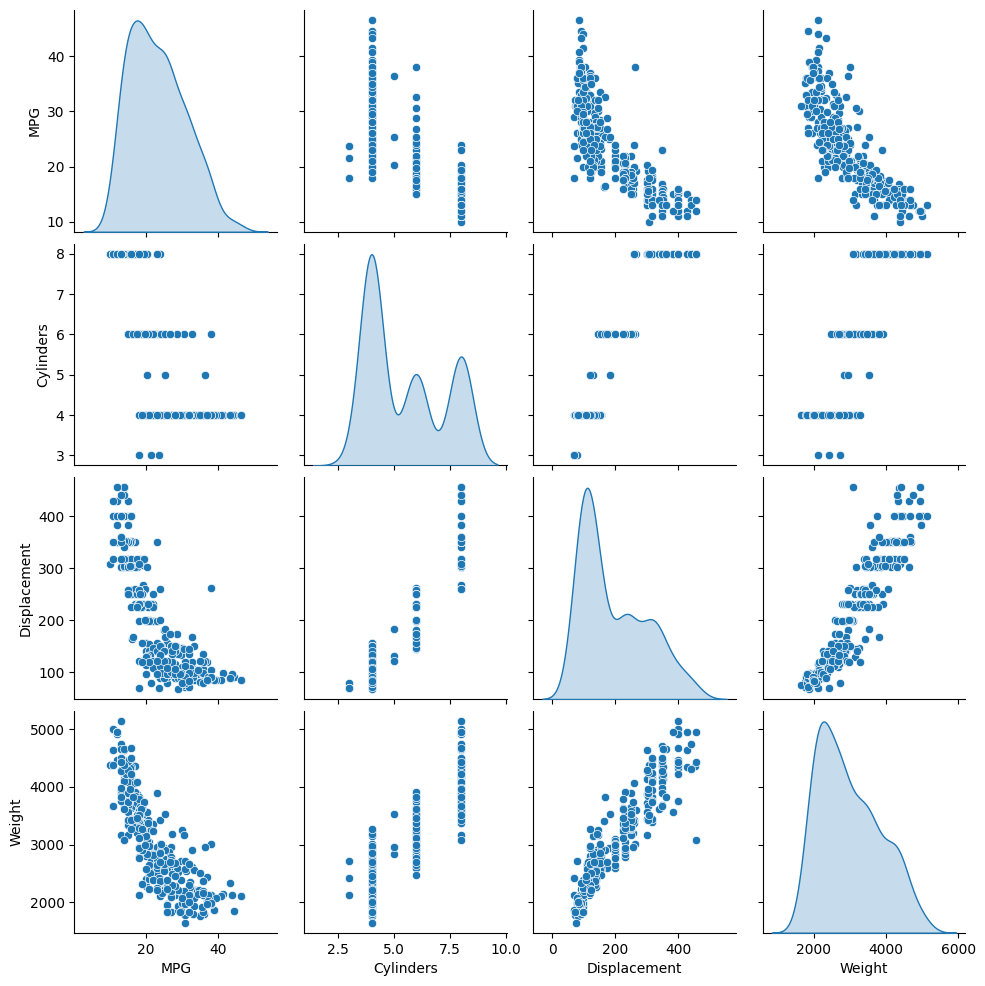

In [12]:
# Miremos la distribución conjunta de algunas columnas de los datos de entrenamiento.
sns.pairplot(train_data[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind = 'kde')

In [14]:
# Miremos las estadisticas generales.
train_stats = train_data.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [15]:
# Separamos las caracteristicas de las etiquetas.
train_labels = train_data.pop('MPG')
test_labels = test_data.pop('MPG')

In [16]:
# Normalizamos la data.
def normalizar(x):
    return (x - train_stats['mean']) / train_stats['std']

norm_train_data = normalizar(train_data)
norm_test_data = normalizar(test_data)

In [17]:
# Construimos el modelo.
def build_model():
    modelo = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    modelo.compile(loss = 'mse',
                   optimizer = optimizer,
                   metrics = ['mae', 'mse'])
    return modelo

In [18]:
modelo = build_model()

In [19]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [20]:
example_batch = norm_train_data[:10]
example_result = modelo.predict(example_batch)
example_result

1/1 [==============================] - 0s 438ms/step


array([[ 0.27643853],
       [-0.13156608],
       [-0.22461052],
       [-0.0859707 ],
       [-0.10451548],
       [-0.29066622],
       [-0.16965966],
       [-0.48157322],
       [-0.08543074],
       [-0.2186006 ]], dtype=float32)

In [21]:
# Entrenemos el modelo.

class PrintDot(keras.callbacks.Callback):
    def on_epoch_and(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print(' .', end = '')

EPOCHS = 1000

history = modelo.fit(
    norm_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()]
)

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.518661,0.992229,2.518661,8.926126,2.371664,8.926126,995
996,2.487472,0.989266,2.487472,8.720413,2.337909,8.720413,996
997,2.486823,1.062829,2.486823,9.275620,2.394743,9.275620,997
998,2.407582,0.986363,2.407582,9.538898,2.511464,9.538898,998
999,2.670406,1.061215,2.670406,9.768594,2.514134,9.768594,999


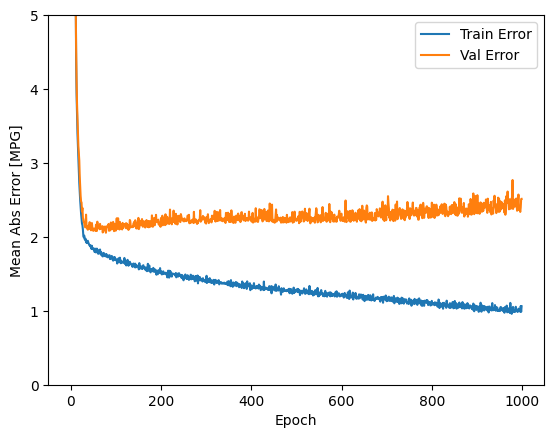

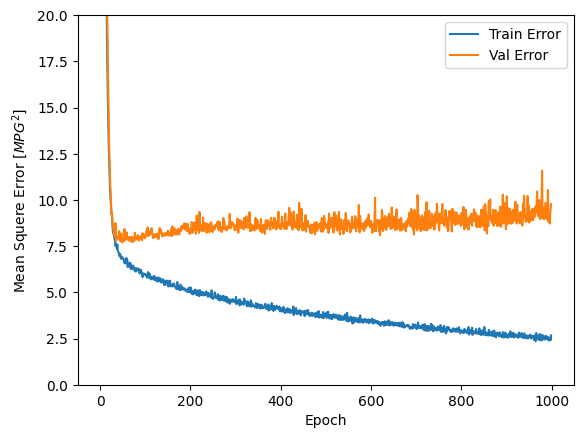

In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0, 5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squere Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()

plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizaremos una *devolución de llamada de EarlyStopping* que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


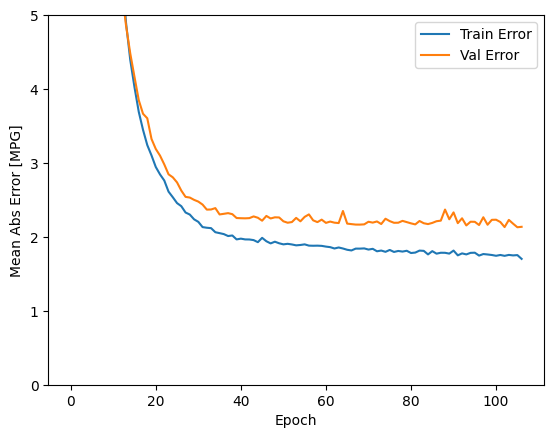

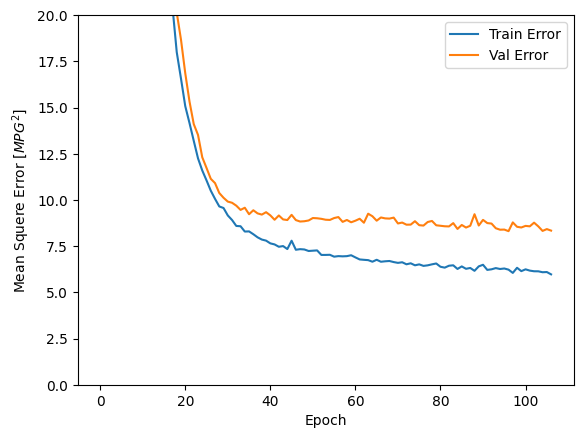

In [27]:
modelo = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = modelo.fit(norm_train_data, train_labels, epochs = EPOCHS,
                     validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])

plot_history(history)

Veamos qué tan bien generaliza el modelo al usar el conjunto ** test **, que no usamos al entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.

In [28]:
loss, mae, mse = modelo.evaluate(norm_test_data, test_labels, verbose = 2)

print('Testing set Mean Abs Error: {:5.2f} MPG".format(mae)')

3/3 - 0s - loss: 5.7108 - mae: 1.8934 - mse: 5.7108 - 97ms/epoch - 32ms/step
Testing set Mean Abs Error: {:5.2f} MPG".format(mae)


3/3 [==============================] - 0s 3ms/step


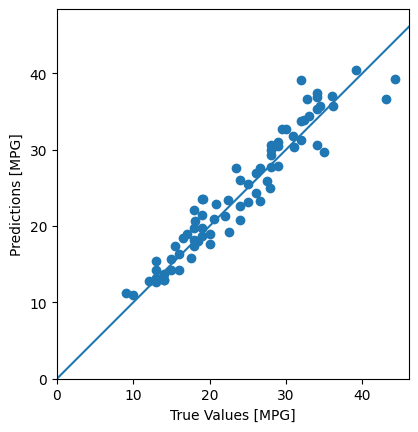

In [30]:
test_predictions = modelo.predict(norm_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

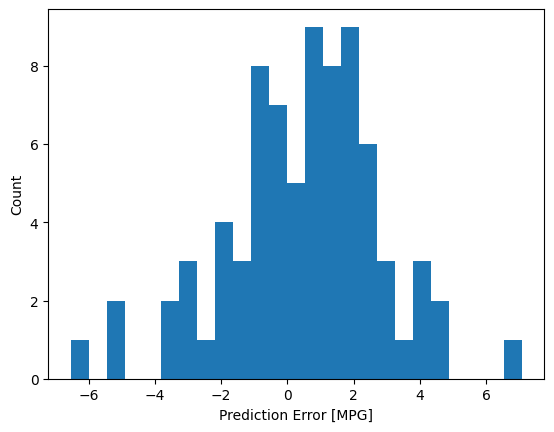

In [31]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')